<a href="https://colab.research.google.com/github/carlosmiguelmarquez/DSP/blob/main/Midterm_Project_Signal-Sorcerers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.optimize import curve_fit
from sqlalchemy import create_engine, text

file_path = '/content/drive/MyDrive/DSP MIDTERMS/signalsorcerers.csv'
data = pd.read_csv(file_path)

data.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,speed,period,warning,pair
0,1,26,1,1,1
1,2,26,1,1,1
2,3,26,1,1,1
3,4,26,1,1,1
4,5,27,1,1,1
5,6,28,1,1,1
6,7,28,1,1,1
7,8,28,1,1,1
8,9,28,1,1,1
9,10,29,1,1,1


In [ ]:
categorical_cols = [cname for cname in data.columns if
                    data[cname].nunique() < 10 and
                    data[cname].dtype == "object"]

numerical_cols = [cname for cname in data.columns if
                data[cname].dtype in ['int64', 'float64']]

In [ ]:
print(categorical_cols)
print(numerical_cols)

[]
['Unnamed: 0', 'speed', 'period', 'warning', 'pair']


In [ ]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(8)

,Total,Percent
Unnamed: 0,0,0.0
speed,0,0.0
period,0,0.0
warning,0,0.0
pair,0,0.0


In [ ]:
data.dtypes.value_counts()

int64    5
dtype: int64

In [ ]:
corrs = data.corr()
corrs

,Unnamed: 0,speed,period,warning,pair
Unnamed: 0,1.000000,0.231252,0.718939,0.135536,0.461088
speed,0.231252,1.000000,0.080078,0.179883,0.262259
period,0.718939,0.080078,1.000000,0.016315,0.017784
warning,0.135536,0.179883,0.016315,1.000000,0.007407
pair,0.461088,0.262259,0.017784,0.007407,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

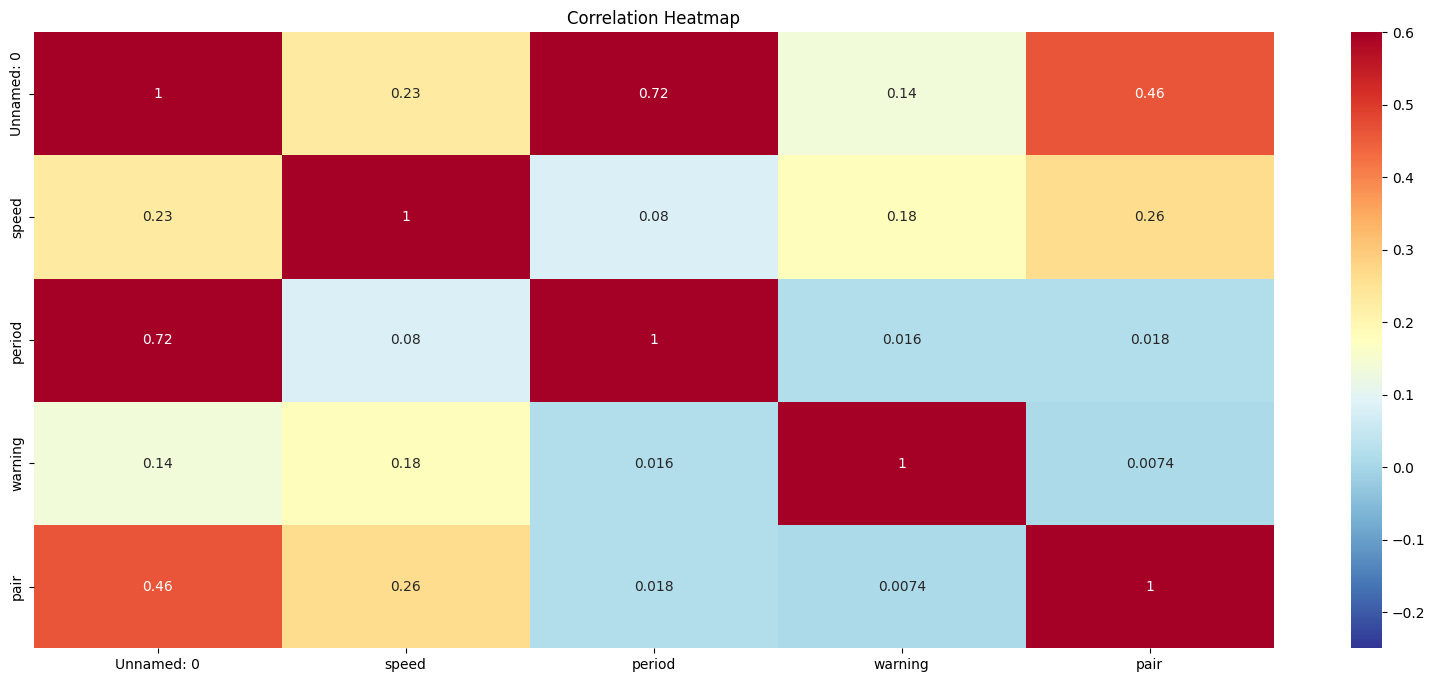

In [ ]:
plt.figure(figsize = (20, 8))
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

<ipython-input-52-2d012a6a5121>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["speed"])


<Axes: xlabel='speed', ylabel='Density'>

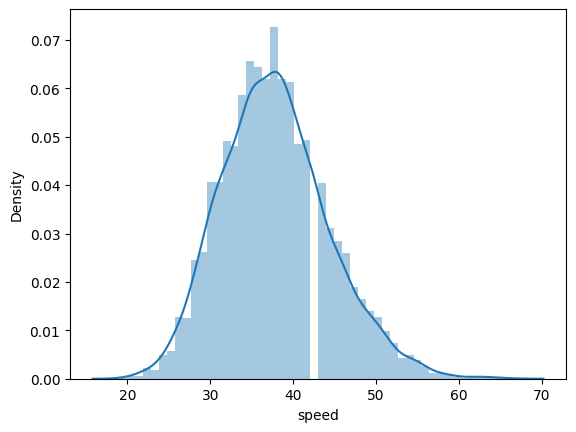

In [ ]:
sns.distplot(data["speed"])

Skew is: 0.42034820345833074


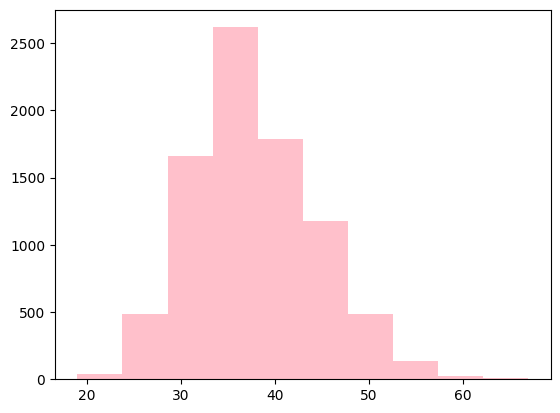

In [ ]:
print ("Skew is:", data.speed.skew())
plt.hist(data.speed, color='pink')
plt.show()

Skew is: -0.10477045583094872


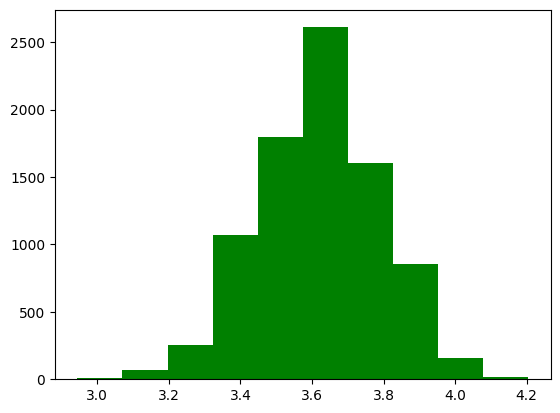

In [ ]:
target = np.log(data.speed)
print ("Skew is:", target.skew())
plt.hist(target, color='green')
plt.show()